Groupe du Projet :

KHOUYA Abdrrahim, 
ELMALKI Khawla,
BELAIDI Jugurta,
GHERBI Rabah,

# Sources des textes 

In [287]:
#Tous les textes utilisés dans ce projet sont tirés au hasard du web, notamment l'encyclopédie wikipedia,
#et quelques differents sites,

#  Les modules importants

In [288]:
#Pandas sert a manipuler et analyser les documents
import pandas as pd

#String sert a manipuler les chaines de cacactere
import string

#module fournit un ensemble de fonctions qui nous permettent de travailler avec des expressions régulières
import re
#Il fournit une interface de haut niveau pour créer des graphiques statistiquement informatifs
import seaborn as sns

#Il donne un message d'avertissement sur une condition particulière qui peut ou non être une erreur
import warnings

#nous l'utilisons pour ignorer des avertissements spécifiques qui peuvent être ignorés en toute sécurité
warnings.filterwarnings('ignore')

#Calcule du temps d'execution du program
import time

In [237]:
#donne  quelques mesures sur le modèle, par exemple la précision
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#TfidVectorizer sert à convertir des chaines de caractère en valeurs numériques
from sklearn.feature_extraction.text import TfidfVectorizer

#Toutes les opérations de transformations vont être centralisées un seul bloc
from sklearn import pipeline

#Le modele utilise la logistique regression
from sklearn.linear_model import LogisticRegression

#Le modele utilise la logistique Naive Bayes
from sklearn.naive_bayes import MultinomialNB

#sert a diviser la base de données en deux parties,une pour trainer le modele et une pour le tester
from sklearn.model_selection import train_test_split

#Pour afficher les graphes
import matplotlib.pyplot as plt

#pour choisir des lignes aleatoire, puisque la base de chaque langue est trop large
import random


# La lecture des données

In [289]:
allemand=open("Allemand.csv", "r",encoding="utf-8").readlines()
anglais=open("Anglais.csv", "r",encoding="utf-8").readlines()
arabe=open("Arabe.csv", "r",encoding="utf-8").readlines()
danish=open("Danish.csv", "r",encoding="utf-8").readlines()
dutch=open("Dutch.csv", "r",encoding="utf-8").readlines()
espagnol=open("Espagnol.csv", "r",encoding="utf-8").readlines()
francais=open("Francais.csv", "r",encoding="utf-8").readlines()
greek=open("Greek.csv", "r",encoding="utf-8").readlines()
italien=open("Italien.csv", "r",encoding="utf-8").readlines()
kannada=open("Kannada.csv", "r",encoding="utf-8").readlines()
malayalam=open("Malayalam.csv", "r",encoding="utf-8").readlines()
portuguese=open("Portuguese.csv", "r",encoding="utf-8").readlines()
russe=open("Russe.csv", "r",encoding="utf-8").readlines()
swedish=open("Swedish.csv","r",encoding="utf-8").readlines()
tamil=open("Tamil.csv","r",encoding="utf-8").readlines()
turkie=open("Turkie.csv","r",encoding="utf-8").readlines()

In [290]:
#Netoyyer le texte et enlever les lignes vides
def remplacer_char(list_de_car):
    return [ phrase.replace('\n',"") for phrase in list_de_car if phrase.replace('\n',"")!=""]

# Le code ci-dessous pour vider la base de donne pour des raisons d'amelioration

In [291]:
with open("database.csv", "w") as file:
    file.truncate(0)
    print("La base de données est bien vide")

La base de données est bien vide


In [292]:
#Remplir la base de donne pour trainer le modele, avec les textes de differents dictionnaires de langues
temps_avant_execution=time.time()
data=open("database.csv","w",encoding="utf-8",newline="")
data.write("Texte,Langue\n")
langue_list=[anglais,allemand,arabe,danish,dutch,espagnol,
             francais,greek,italien,kannada,malayalam
             ,portuguese,russe,swedish,tamil,turkie]
langue_list_str=["allemand","anglais","arabe","danish","dutch","espagnol",
                 "francais","greek","italien","kannada","malayalam",
                 "portuguese","russe","swedish","tamil","turkie"]

for lang in langue_list:
    for line in remplacer_char(lang):
        data.write(line+"\n")

print("le temps de remplissage de la base de donnees est : ",time.time()-temps_avant_execution)        
        

le temps de remplissage de la base de donnees est :  0.01888251304626465


In [293]:
#l'importation de la base de donnees dans lavariable df
df = pd.read_csv('database.csv', on_bad_lines='skip')

#Supprimer les valeurs NaN et on remis df dans elle meme
df=df.dropna()

In [294]:
#il est utilisé pour renvoyer les 5 premières lignes de la dataset
df.head()

,Texte,Langue
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


# Information sur la base des données

In [295]:
#Information sur la base des données
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10274 entries, 0 to 10273
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Texte   10274 non-null  object
 1   Langue  10274 non-null  object
dtypes: object(2)
memory usage: 240.8+ KB


In [296]:
#nombre de ligne qui correspond a chaque langue
df.Langue.value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Name: Langue, dtype: int64

# Prétraitement du texte

In [297]:
'''Cette fonction sert à supprimer les symboles
et les chiffres dans les textes avant la construction du modèle'''

def supprimer_symbol_chiffre(text):  
    text = re.sub(r'[{}]'.format(string.punctuation), '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[@]', '', text)
    return text.lower()

In [298]:
'''Cette fonction supprime les lettres alphabétiques, 
   son utilité réside dans le traitement des languages 
   qui ont des alphabets different de l'alphabet latins'''

def supprimer_alphabet_latins(text):        
        text = re.sub(r'[a-zA-Z]+', '', text)
        return text.lower()

In [299]:
'''On applique la fonction en haut à la variable df avec la fonction lambda,
   elle retorune des textes sans alphabets latins'''
li=['Russian','Malyalam','Kannada','Tamil','Arabic']
texte_sans_alphabet_latins = df.apply(lambda x: supprimer_alphabet_latins(x.Texte) if x.Langue in li else x.Texte, axis = 1)
texte_sans_alphabet_latins

0         Nature, in the broadest sense, is the natural...
1        "Nature" can refer to the phenomena of the phy...
2        The study of nature is a large, if not the onl...
3        Although humans are part of nature, human acti...
4        [1] The word nature is borrowed from the Old F...
                               ...                        
10269    hatan ne oldu o günden itibaren sana güzel bir...
10270    narcisa ilk başta mücadele ettiği yollarını de...
10271    Nasıl' narsisizm artık marian onlara hem olan ...
10272    Artık altın ekmek istemeyeceğini mi tahmin edi...
10273    terry sen aslında o meleğe biraz benziyorsun a...
Length: 10274, dtype: object

In [300]:
'''On applique la deuxième fonction en haut à la variable X0;
   elle retourne des textes sans caractères spéciaux'''

texte_sans_symbols = texte_sans_alphabet_latins.apply(supprimer_symbol_chiffre)
texte_sans_symbols

0         nature in the broadest sense is the natural p...
1        nature can refer to the phenomena of the physi...
2        the study of nature is a large if not the only...
3        although humans are part of nature human activ...
4         the word nature is borrowed from the old fren...
                               ...                        
10269    hatan ne oldu o günden itibaren sana güzel bir...
10270    narcisa ilk başta mücadele ettiği yollarını de...
10271    nasıl narsisizm artık marian onlara hem olan h...
10272    artık altın ekmek istemeyeceğini mi tahmin edi...
10273    terry sen aslında o meleğe biraz benziyorsun a...
Length: 10274, dtype: object

In [301]:
#On récupère la colonne des languages
y = df['Langue']

# Création des modèles

In [302]:
'''Cette ligne divise la base de données en deux parties,
une pour trainer le modèle et une pour le tester'''

x_train, x_test, y_train, y_test = train_test_split(texte_sans_symbols,y, random_state=42)

In [303]:
#Cette ligne vise à mieux définir l'importance d'un mot pour le document,
# elle compte combien de fois un mot apparaît dans le document
vectorizer = TfidfVectorizer(ngram_range=(1,3), analyzer='char')

In [304]:
#On construit notre modèle de  régression logistique
modelreg = pipeline.Pipeline([('vectorizer', vectorizer),('clf', LogisticRegression())])

#On construit notre modèle de Naive Bayes
modelbayes = pipeline.Pipeline([('vectorizer', vectorizer),('clf', MultinomialNB())])


In [305]:
#Cette ligne traine le modèle logistique et ajuster ses paramètres pour minimiser l'erreur
temps_debut=time.time()
modelreg.fit(x_train,y_train)
print("Le temps de la construction du modele  logistique est : {}".format(time.time() - temps_debut))

Le temps de la construction du modele  logistique est : 10.18108582496643


In [306]:
#Cette ligne traine le modèle logistique et ajuster ses paramètres pour minimiser l'erreur
temps_debut=time.time()
modelbayes.fit(x_train,y_train)
print("Le temps de la construction du modele Naive Bayes est : {}".format(time.time() - temps_debut))

Le temps de la construction du modele Naive Bayes est : 1.049415111541748


# Analyse de la certitude 

In [307]:
#Construire le vecteur des languages prévu pour logistique regression
y_pred_logistic = model.predict(x_test)
accuracy_logistic = accuracy_score(y_test,y_pred)
cm_logistic = confusion_matrix(y_test,y_pred)

In [308]:
#Construire le vecteur des languages prévu pour Naive Bayes
y_pred_bayes = model.predict(x_test)
accuracy_bayes = accuracy_score(y_test,y_pred)
cm_bayes = confusion_matrix(y_test,y_pred)

In [309]:
#affichage de la précision du modele logistique
print("la précision du modèle logistique regression : :",accuracy_logistic)

#affichage de la précision du modele Naive Bayes
print("la précision du modèle logistique regression : :",accuracy_bayes)

la précision du modèle logistique regression : : 0.9832619696379914
la précision du modèle logistique regression : : 0.9832619696379914


In [322]:
#cette ligne affiche quelques différences entre les valeurs réelles et les values prévues pour logistique regression
print(classification_report(y_test,y_pred_logistic))

              precision    recall  f1-score   support

      Arabic       1.00      0.99      1.00       123
      Danish       0.97      0.94      0.95        94
       Dutch       0.96      0.96      0.96       142
     English       0.99      0.99      0.99       363
      French       0.98      1.00      0.99       250
      German       0.99      0.97      0.98       133
       Greek       1.00      1.00      1.00        94
     Italian       0.97      0.98      0.98       152
     Kannada       1.00      1.00      1.00        84
   Malayalam       1.00      1.00      1.00       140
  Portugeese       0.99      0.96      0.97       181
     Russian       1.00      1.00      1.00       186
     Spanish       0.98      1.00      0.99       210
    Sweedish       0.97      0.98      0.98       183
       Tamil       1.00      1.00      1.00       117
     Turkish       0.98      0.99      0.99       117

    accuracy                           0.99      2569
   macro avg       0.99   

In [311]:
#cette ligne affiche quelques différences entre les valeurs réelles et les values prévues pour Naive Bayes
print(classification_report(y_test,y_pred_bayes))

              precision    recall  f1-score   support

      Arabic       1.00      0.99      1.00       123
      Danish       0.97      0.94      0.95        94
       Dutch       0.96      0.96      0.96       142
     English       0.99      0.99      0.99       363
      French       0.98      1.00      0.99       250
      German       0.99      0.97      0.98       133
       Greek       1.00      1.00      1.00        94
     Italian       0.97      0.98      0.98       152
     Kannada       1.00      1.00      1.00        84
   Malayalam       1.00      1.00      1.00       140
  Portugeese       0.99      0.96      0.97       181
     Russian       1.00      1.00      1.00       186
     Spanish       0.98      1.00      0.99       210
    Sweedish       0.97      0.98      0.98       183
       Tamil       1.00      1.00      1.00       117
     Turkish       0.98      0.99      0.99       117

    accuracy                           0.99      2569
   macro avg       0.99   

# Carte thermique pour le modele Logistique

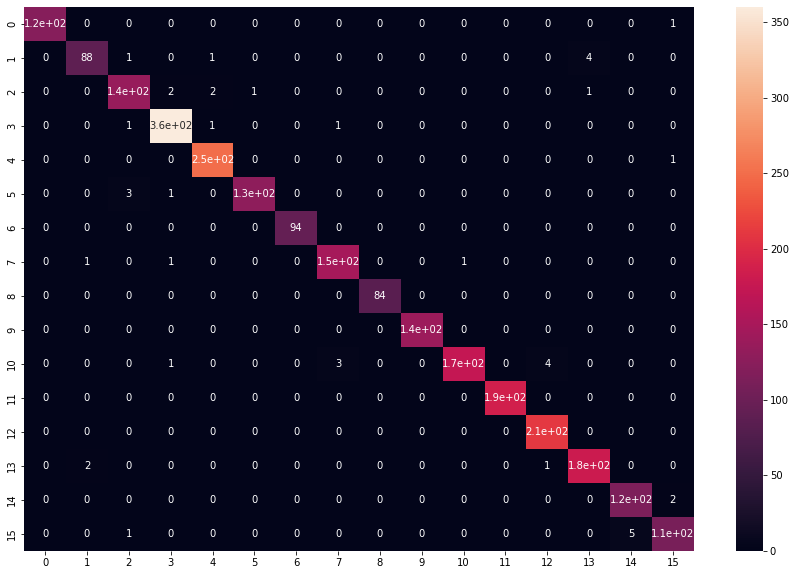

In [323]:
#Description en dessous du graphe
plt.figure(figsize=(15,10))
sns.heatmap(cm_logistic, annot = True)
plt.show()

La carte thermique ci-dessus fournit un moyen rapide et intuitif d'identifier les domaines dans lesquels le modele fonctionne bien et les domaines dans lesquels il rencontre des difficultés. Par exemple, si les cellules de la diagonale de la carte thermique sont plus lumineuses, cela indique que le modele fait de nombreuses prédictions correctes.

Inversement, si les cellules des régions hors diagonale de la carte thermique sont plus lumineuses, cela indique que le modele fait de nombreuses prédictions incorrectes.

Dans l'ensemble, la carte thermique d'une matrice de confusion est un moyen efficace de visualiser les performances d'un modele, ce qui facilite l'identification de ses forces et de ses faiblesses et permet de mieux comprendre comment il peut être amélioré.

# Carte thermique pour le modele Naive Bayes 

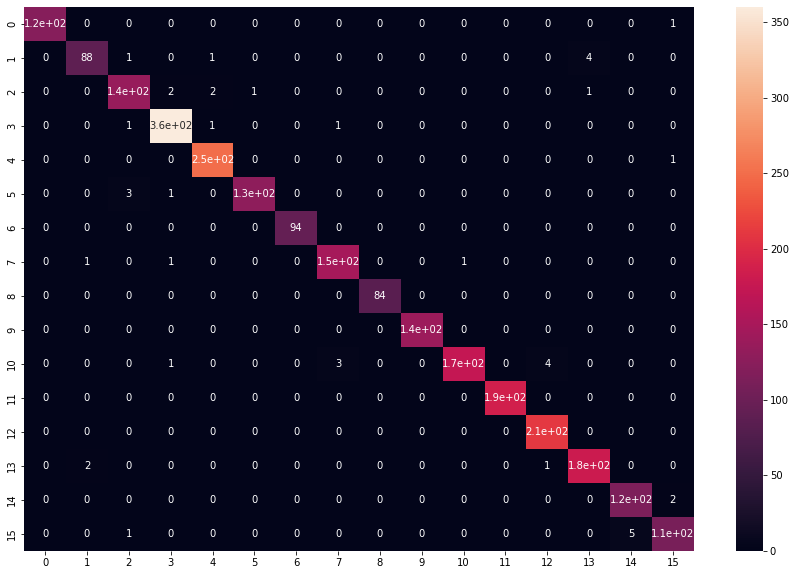

In [313]:
#utilisé pour afficher la distribution des valeurs et visualiser les données qui ont de nombreuses valeurs
plt.figure(figsize=(15,10))
sns.heatmap(cm_bayes, annot = True)
plt.show()

# Test du modèle

In [316]:
#Fonction de prediction de la langue pour logistique
def predire_la_langue_logi(text):
    langue = modelreg.predict([text])
    print('La language du text est : ',langue[0])


In [317]:
#Fonction de prediction de la langue pour Bayes
def predire_la_langue_bayes(text):
    langue = modelbayes.predict([text])
    print('La language du text est : ',langue[0])

In [318]:
#Quelques exemples de language pour tester le modèle logistiques


# Anglais
predire_la_langue_logi("MASTER AIMAF IS THE ACTUARIAL MASTER'S DEGREE IN ROUEN")

# Francais
predire_la_langue_logi("VÉRIFICATION DU MODÈLE DE DÉTECTION DE LA LANGUE")

# Arabe
predire_la_langue_logi("روان (بالفرنسية: Rouen) هي مدينة وبلدية فرنسية تابعة لإقليم السين البحرية بمنطقة نورماندي بشمال غرب فرنسا.")

#Allemand
predire_la_langue_logi("ROUEN IST EINE SCHÖNE STADT MIT SCHÖNEN HISTORISCHEN DENKMÄLERN")

#Espagnol
predire_la_langue_logi("Ruan4 (en francés, Rouen pronunciado /ʁwɑ̃/) es una ciudad y comuna del noroeste de Francia, capital de la región de Normandía y del departamento de Sena Marítimo. Destaca por sus casas con paredes de entramado, sus callejuelas y sus iglesias góticas. Es conocida como la «Ciudad de los Cien Campanarios» y por haber sido escenario en 1431 del martirio de Juana de Arco, condenada y quemada en la hoguera, en la plaza del Vieux Marché.")


La language du text est :  English
La language du text est :  French
La language du text est :  Arabic
La language du text est :  German
La language du text est :  Spanish


In [319]:
#Quelques exemples de language pour tester le modèle Naive Bayes


# Anglais
predire_la_langue_bayes("MASTER AIMAF IS THE ACTUARIAL MASTER'S DEGREE IN ROUEN")

# Francais
predire_la_langue_bayes("VÉRIFICATION DU MODÈLE DE DÉTECTION DE LA LANGUE")

# Arabe
predire_la_langue_bayes("روان (بالفرنسية: Rouen) هي مدينة وبلدية فرنسية تابعة لإقليم السين البحرية بمنطقة نورماندي بشمال غرب فرنسا.")

#Allemand
predire_la_langue_bayes("ROUEN IST EINE SCHÖNE STADT MIT SCHÖNEN HISTORISCHEN DENKMÄLERN")

#Espagnol
predire_la_langue_bayes("Ruan4 (en francés, Rouen pronunciado /ʁwɑ̃/) es una ciudad y comuna del noroeste de Francia, capital de la región de Normandía y del departamento de Sena Marítimo. Destaca por sus casas con paredes de entramado, sus callejuelas y sus iglesias góticas. Es conocida como la «Ciudad de los Cien Campanarios» y por haber sido escenario en 1431 del martirio de Juana de Arco, condenada y quemada en la hoguera, en la plaza del Vieux Marché.")


La language du text est :  English
La language du text est :  French
La language du text est :  Arabic
La language du text est :  English
La language du text est :  Spanish


# Test du modèle avec des textes  larges

# Le texte suivant est en anglais pour Naive Bayes 


France (French: [fʁɑ̃s] Listen), officially the French Republic (French: République française [ʁepyblik frɑ̃sɛz]),[14] is a country primarily located in Western Europe. It also includes overseas regions and territories in the Americas and the Atlantic, Pacific and Indian Oceans,[XII] giving it one of the largest discontiguous exclusive economic zones in the world. Its metropolitan area extends from the Rhine to the Atlantic Ocean and from the Mediterranean Sea to the English Channel and the North Sea; overseas territories include French Guiana in South America, Saint Pierre and Miquelon in the North Atlantic, the French West Indies, and many islands in Oceania and the Indian Ocean. Its eighteen integral regions (five of which are overseas) span a combined area of 643,801 km2 (248,573 sq mi) and contain close to 68 million people (as of July 2022).[5][8]


In [320]:
predire_la_langue_bayes("France (French: [fʁɑ̃s] Listen), officially the French Republic (French: République française [ʁepyblik frɑ̃sɛz]),[14] is a country primarily located in Western Europe. It also includes overseas regions and territories in the Americas and the Atlantic, Pacific and Indian Oceans,[XII] giving it one of the largest discontiguous exclusive economic zones in the world. Its metropolitan area extends from the Rhine to the Atlantic Ocean and from the Mediterranean Sea to the English Channel and the North Sea; overseas territories include French Guiana in South America, Saint Pierre and Miquelon in the North Atlantic, the French West Indies, and many islands in Oceania and the Indian Ocean. Its eighteen integral regions (five of which are overseas) span a combined area of 643,801 km2 (248,573 sq mi) and contain close to 68 million people (as of July 2022)")

La language du text est :  English


# Le texte suivant est en Dutch pour le modele logistique

Frankrijk (Frans: [fʁɑ̃s] Listen), officieel de Franse Republiek (Frans: République française [ʁepyblik frɑ̃sɛz]), [14] is een land dat voornamelijk in West-Europa ligt. Het omvat ook overzeese regio's en gebieden in Amerika en de Atlantische Oceaan, de Stille Oceaan en de Indische Oceaan, [XII] waardoor het een van de grootste niet-aaneengesloten exclusieve economische zones ter wereld is. Het grootstedelijk gebied strekt zich uit van de Rijn tot de Atlantische Oceaan en van de Middellandse Zee tot het Engelse Kanaal en de Noordzee; overzeese gebieden zijn Frans-Guyana in Zuid-Amerika, Saint Pierre en Miquelon in de Noord-Atlantische Oceaan, Frans West-Indië en vele eilanden in Oceanië en de Indische Oceaan. De achttien integrale regio's (waarvan er vijf overzees zijn) beslaan een gecombineerd gebied van 643.801 km2 (248.573 vierkante mijl) en bevatten bijna 68 miljoen mensen (vanaf juli 2022).


In [321]:
predire_la_langue_logi("Frankrijk (Frans: [fʁɑ̃s] Listen), officieel de Franse Republiek (Frans: République française [ʁepyblik frɑ̃sɛz]), [14] is een land dat voornamelijk in West-Europa ligt. Het omvat ook overzeese regio's en gebieden in Amerika en de Atlantische Oceaan, de Stille Oceaan en de Indische Oceaan, [XII] waardoor het een van de grootste niet-aaneengesloten exclusieve economische zones ter wereld is. Het grootstedelijk gebied strekt zich uit van de Rijn tot de Atlantische Oceaan en van de Middellandse Zee tot het Engelse Kanaal en de Noordzee; overzeese gebieden zijn Frans-Guyana in Zuid-Amerika, Saint Pierre en Miquelon in de Noord-Atlantische Oceaan, Frans West-Indië en vele eilanden in Oceanië en de Indische Oceaan. De achttien integrale regio's (waarvan er vijf overzees zijn) beslaan een gecombineerd gebied van 643.801 km2 (248.573 vierkante mijl) en bevatten bijna 68 miljoen mensen (vanaf juli 2022).Frankrijk is een unitaire semi-presidentiële republiek met als hoofdstad Parijs, de grootste stad van het land en het belangrijkste culturele en commerciële centrum; andere grote stedelijke gebieden zijn Marseille, Lyon, Toulouse, Lille, Bordeaux en Nice.Bewoond sinds het paleolithicum, werd het grondgebied van Europees Frankrijk tijdens de ijzertijd bewoond door Keltische stammen die bekend staan ​​als Galliërs. Rome annexeerde het gebied in 51 voor Christus, wat leidde tot een aparte Gallo-Romeinse cultuur die de basis legde voor de Franse taal. De Germaanse Franken vormden het koninkrijk Francia, dat het hart van het Karolingische rijk werd. Het Verdrag van Verdun van 843 verdeelde het rijk, waarbij West-Francië in 987 het koninkrijk Frankrijk werd. In de hoge middeleeuwen was Frankrijk een machtig maar sterk gedecentraliseerd feodaal koninkrijk. Filips II versterkte met succes de koninklijke macht en versloeg zijn rivalen om de omvang van de kroonlanden te verdubbelen; tegen het einde van zijn regering was Frankrijk naar voren gekomen als de machtigste staat van Europa. Van het midden van de 14e tot het midden van de 15e eeuw werd Frankrijk ondergedompeld in een reeks dynastieke conflicten waarbij Engeland betrokken was, gezamenlijk bekend als de Honderdjarige Oorlog, en als resultaat ontstond een duidelijke Franse identiteit. De Franse Renaissance zag kunst en cultuur bloeien, conflicteren met het Huis van Habsburg en de oprichting van een wereldwijd koloniaal rijk, dat tegen de 20e eeuw het op een na grootste ter wereld zou worden. De tweede helft van de 16e eeuw werd gedomineerd door religieuze burgeroorlogen tussen katholieken en hugenoten die het land ernstig verzwakten. Frankrijk kwam opnieuw naar voren als de dominante macht van Europa in de 17e eeuw onder Lodewijk XIV na de Dertigjarige Oorlog. Ontoereikend economisch beleid, onbillijke belastingen en frequente oorlogen (met name een nederlaag in de Zevenjarige Oorlog en kostbare betrokkenheid bij de Amerikaanse Onafhankelijkheidsoorlog) brachten het koninkrijk tegen het einde van de 18e eeuw in een precaire economische situatie. Dit leidde tot de Franse Revolutie van 1789, die het Ancien Régime omver wierp en de Verklaring van de Rechten van de Mens opstelde, die tot op de dag van vandaag de idealen van het land uitdrukt.Frankrijk bereikte zijn politieke en militaire hoogtepunt in het begin van de 19e eeuw onder Napoleon Bonaparte, onderwierp een groot deel van continentaal Europa en vestigde het Eerste Franse Keizerrijk. De Franse Revolutionaire en Napoleontische oorlogen vormden de loop van de Europese en wereldgeschiedenis. De ineenstorting van het rijk luidde een periode van relatieve achteruitgang in, waarin Frankrijk een tumultueuze opeenvolging van regeringen doormaakte tot de oprichting van de Franse Derde Republiek tijdens de Frans-Pruisische oorlog in 1870. De daaropvolgende decennia zagen een periode van optimisme, culturele en wetenschappelijke bloei , evenals economische welvaart, bekend als de Belle Époque. Frankrijk was een van de belangrijkste deelnemers aan de Eerste Wereldoorlog, waaruit het als overwinnaar tevoorschijn kwam tegen hoge menselijke en economische kosten. Het behoorde tot de geallieerde mogendheden van de Tweede Wereldoorlog, maar werd al snel bezet door de asmogendheden in 1940. Na de bevrijding in 1944 werd de kortstondige Vierde Republiek opgericht en later ontbonden in de loop van de Algerijnse oorlog. De huidige Vijfde Republiek werd in 1958 opgericht door Charles de Gaulle. Algerije en de meeste Franse koloniën werden onafhankelijk in de jaren zestig, waarbij de meerderheid nauwe economische en militaire banden met Frankrijk behield.")

La language du text est :  Dutch


# Conclusion .

Naive Bayes est un algorithme simple et rapide qui convient parfaitement aux tâches de classification de texte telles que la détection de la langue. Il est basé sur le théorème de Bayes et suppose que les caractéristiques (par exemple les mots dans un texte) sont indépendantes les unes des autres, ce qui n'est souvent pas le cas dans la détection de la langue. Malgré cette limitation, Naive Bayes peut bien fonctionner dans la pratique, en particulier lorsque les données sont volumineuses et que l'ensemble de fonctionnalités n'est pas très complexe.

La régression logistique est un algorithme plus complexe que Naive Bayes, mais offre une plus grande flexibilité et la possibilité de modéliser des relations plus complexes entre les caractéristiques. Il est bien adapté aux tâches où les caractéristiques sont fortement corrélées et peut gérer des relations non linéaires entre les caractéristiques. La régression logistique peut également générer la probabilité qu'un échantillon appartienne à chaque classe, ce qui peut être utile pour classer les résultats de la détection de la langue.

En conclusion, Naive Bayes est un bon choix pour une détection de langue simple et rapide, tandis que la régression logistique est un meilleur choix pour une détection de langue plus complexe et précise. Le choix entre les deux dépendra des exigences spécifiques d'un projet, telles que la taille et la complexité des données, le niveau de précision souhaité et les ressources informatiques disponibles.